In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
local_df = pd.read_csv("../measurements/local_long/map.csv")
map_df = pd.read_csv("../measurements/real_bw_test/map.csv")
cha_df = pd.read_csv("../measurements/real_bw_test/characteristic.csv")
mag_df = pd.read_csv("../measurements/real_bw_test/manager.csv")
# static_map_df = pd.read_csv("../measurements/jpeg_no_change/map.csv")
# static_cha_df = pd.read_csv("../measurements/jpeg_no_change/characteristic.csv")

In [4]:
map_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,feasible,sensitivity,map
0,0.00,60,1,6000000.0,0.3,1,-1,0.500000,0.500000
1,0.15,1,2,6000000.0,0.3,2,-1,0.666667,0.416667
2,0.05,100,1,6000000.0,0.3,3,-1,1.000000,0.750000
3,0.00,90,1,6000000.0,0.3,4,-1,0.800000,0.558333
4,0.00,3,2,6000000.0,0.3,5,-1,0.800000,0.750000


In [5]:
quality_level = []

for q in map_df["quality"]:
    if q>50:
        quality_level.append((q-50)/10)
    else:
        quality_level.append(q)

map_df["quality_level"] = quality_level

# Configuration

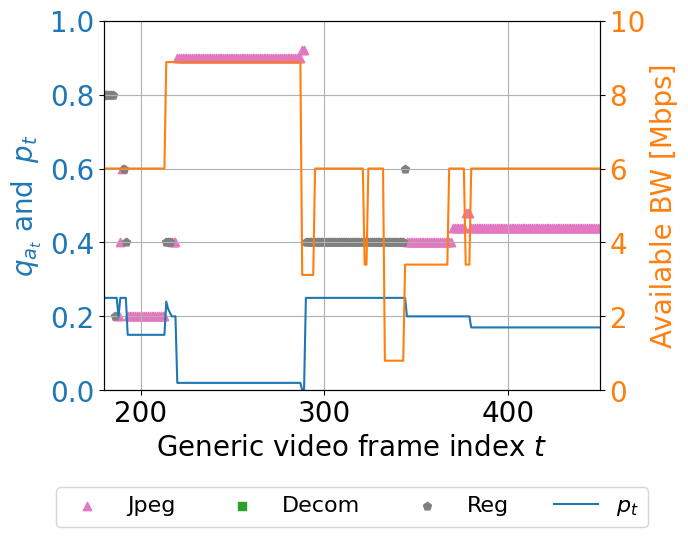

In [6]:
# fig, ax1 = plt.subplots(figsize=(6,4))
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('$q_{a_t}$ and  $p_t$', color=color)

ax1.tick_params(axis='y', labelcolor=color)


# ax1.plot(map_df["frame_id"].to_numpy(),map_df["quality_level"].to_numpy(),color=color)
_jpeg_df = map_df[map_df["technique"] == 1]
ax1.scatter(_jpeg_df["frame_id"].to_numpy(),_jpeg_df["quality_level"].to_numpy()/5,color="tab:pink",marker="^", label="Jpeg")
_decom_df = map_df[map_df["technique"] == 2]
ax1.scatter(_decom_df["frame_id"].to_numpy(),_decom_df["quality_level"].to_numpy()/5,color="tab:green",marker="s", label="Decom")
_reg_df = map_df[map_df["technique"] == 3]
ax1.scatter(_reg_df["frame_id"].to_numpy(),_reg_df["quality_level"].to_numpy()/5,color="tab:gray",marker="p",label="Reg")
ax1.grid()
ax1.plot(map_df["frame_id"].to_numpy(),map_df["pruning_thresh"].to_numpy(), color=color, label="$p_t$")
ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plt.grid()
ax1.set_xlim([180, 450])
ax2.set_ylim([0,10])
ax1.set_ylim([0,1])
ax1.legend(ncol=4,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
# ax1.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_config.pdf", bbox_inches='tight')
# ax3 = ax2.twinx() 
# color = 'tab:purple'
# ax3.set_ylabel('Bandwidth [Mbps]', color=color)  # we already handled the x-label with ax1
# ax3.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
# ax3.tick_params(axis='y', labelcolor=color)

# mAP drop

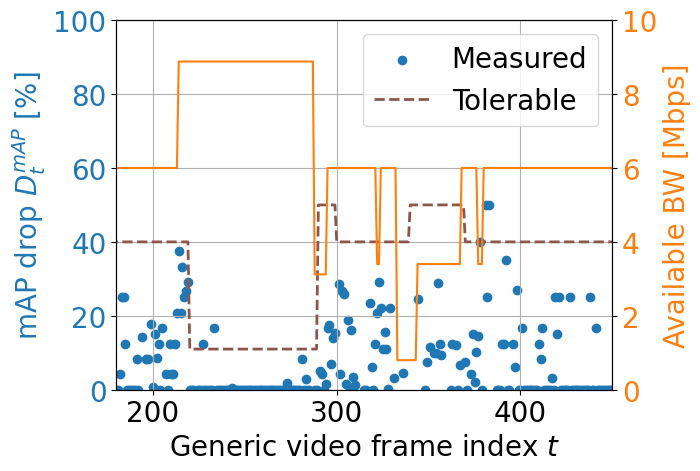

In [7]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('mAP drop $D^{mAP}_t$ [%]', color=color)
ax1.tick_params(axis='y', labelcolor=color)

drops = (local_df["map"].to_numpy() - map_df["map"].to_numpy())*100
ax1.scatter(map_df["frame_id"].to_numpy(),drops,label="Measured", color=color)
ax1.plot(map_df["frame_id"].to_numpy(),map_df["drop"].to_numpy()*100, linestyle='--', linewidth=2,color="tab:brown",label="Tolerable" )
# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([180, 450])
ax1.set_ylim([0,100])
ax2.set_ylim([0,10])
ax1.grid()

# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_map_drop.pdf", bbox_inches='tight')

In [8]:
# temp  = local_df["map"].to_numpy() - static_map_df["map"].to_numpy()

# temp.std()

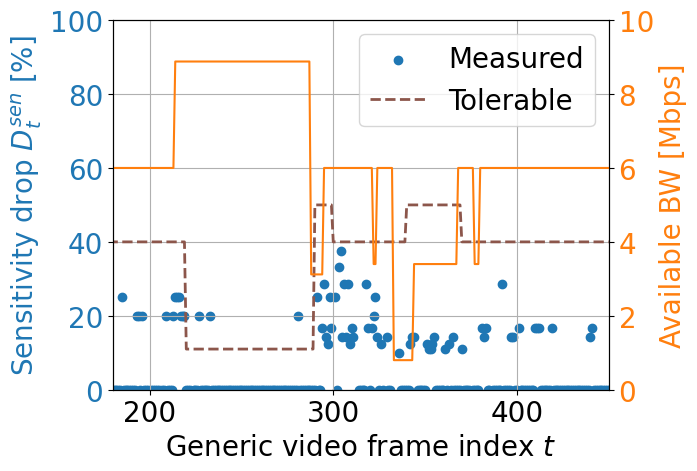

In [9]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Sensitivity drop $D^{sen}_t$ [%]', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy())*100,label="Measured", color= color)
# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")
ax1.plot(map_df["frame_id"].to_numpy(),map_df["drop"].to_numpy()*100, linestyle='--', linewidth=2,color="tab:brown",label="Tolerable" )

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([180, 450])
ax1.set_ylim([0,100])
ax2.set_ylim([0,10])
ax1.grid()
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_sensitivity_drop.pdf", bbox_inches='tight')

In [10]:
# temp  = local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()

# temp.std()

# Compression ratio

In [11]:
cha_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,sparsity,decomposability,regularity,pictoriality,compression_ratio,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr,consumed_bw
0,0.00,60,1,6000000.0,0.3,1,0.000000,-1,-1,-1,23.517837,14717,15461,7.042404,-1.0,-1.0,-1.0
1,0.15,1,2,6000000.0,0.3,2,0.907776,-1,-1,-1,13.000000,26624,142843,7.313552,-1.0,-1.0,-1.0
2,0.05,100,1,6000000.0,0.3,3,0.471940,-1,-1,-1,5.313030,65144,65888,20.123494,-1.0,-1.0,-1.0
3,0.00,90,1,6000000.0,0.3,4,0.000000,-1,-1,-1,27.939296,12388,13132,19.876214,-1.0,-1.0,-1.0
4,0.00,3,2,6000000.0,0.3,5,0.000000,-1,-1,-1,4.333333,79872,197124,20.045373,-1.0,-1.0,-1.0


In [12]:
mag_df.head()

,frame_id,bandwidth,drop,target_fps,technique,feasibility,target_cmp,target_snr,est_cmp,est_snr,pruning_thresh,quality,jpeg_F,decom_F,reg_F,opt_time
0,1,6000000.0,0.3,5,1,-1,-1.0,-1,-1.0,-1.0,0.00,60,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.249414
1,2,6000000.0,0.3,5,2,-1,-1.0,-1,-1.0,-1.0,0.15,1,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.063394
2,3,6000000.0,0.3,5,1,-1,-1.0,-1,-1.0,-1.0,0.05,100,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.056769
3,4,6000000.0,0.3,5,1,-1,-1.0,-1,-1.0,-1.0,0.00,90,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.058306
4,5,6000000.0,0.3,5,2,-1,-1.0,-1,-1.0,-1.0,0.00,3,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.070049


In [13]:
# raw_tensor_size = 128*26*26*4 # bytes
# cha_df["ratio"] = raw_tensor_size/cha_df["datasize_real"]
# static_cha_df["ratio"] = raw_tensor_size/static_cha_df["datasize_real"]

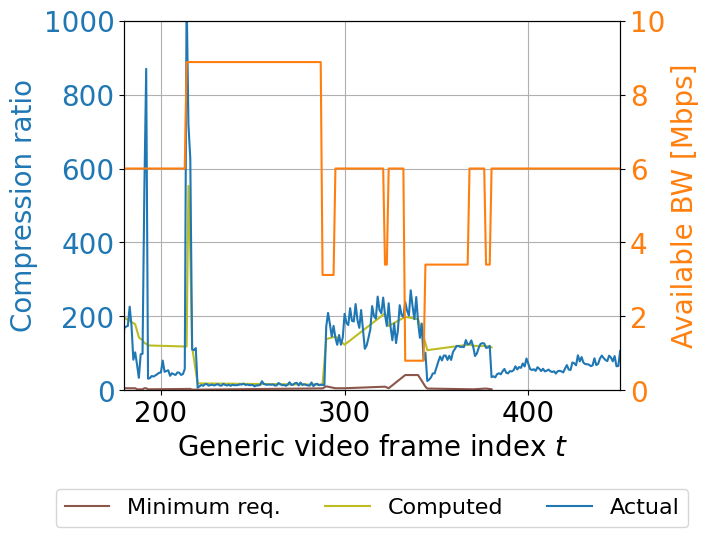

In [14]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Compression ratio', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["target_cmp"].to_numpy(),color="tab:brown", label="Minimum req.")
ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["est_cmp"].to_numpy(),color="tab:olive", label="Computed")
ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["compression_ratio"].to_numpy(),color="tab:blue", label="Actual")
# plt.plot(cha_df["frame_id"].to_numpy(),raw_tensor_size*8/(cha_df["bandwidth"]*0.01),color="tab:purple",label="Limit")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["target_cmp"],color="tab:brown",label="Target(est)")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["ratio"],color="tab:orange",label="CoTeD")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["ratio"],color="tab:blue",label="Static")
ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
ax1.set_xlim([180, 450])
ax1.set_ylim([0,1000])
ax2.set_ylim([0,10])
ax1.grid()
# plt.savefig("./images/jpeg_cmp_ratio.pdf", bbox_inches='tight')

# Bandwidth

Text(0, 0.5, 'Bandwidth [Mbps]')

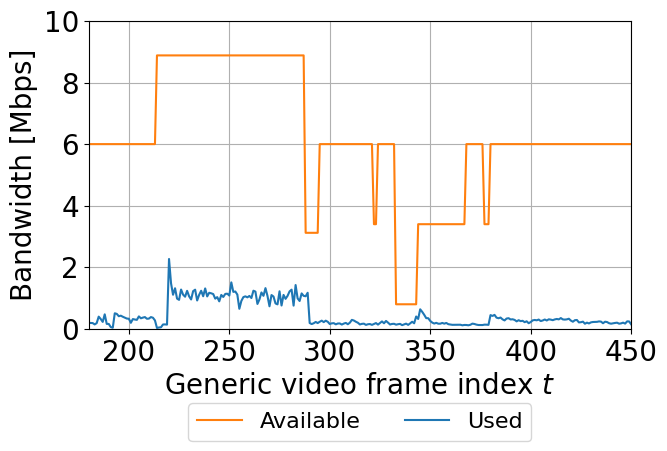

In [15]:
plt.figure(figsize=(7,4))


# feasibility = map_df["feasible"].to_numpy()
# for i in range(len(feasibility)):
#     if feasibility[i] == 1:
#         plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
#     else:
#         plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

plt.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6,color="tab:orange",label="Available")
plt.plot(cha_df["frame_id"].to_numpy(),cha_df["consumed_bw"]/1e6,color="tab:blue",label="Used")
# plt.plot(static_cha_df["frame_id"].to_numpy(),(static_cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:blue",label="Static")
plt.xlim([180,450])
plt.ylim([0,10])
plt.legend(ncol=2,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
plt.grid()
plt.xlabel("Generic video frame index $t$")
plt.ylabel("Bandwidth [Mbps]")
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_bandwidth.pdf", bbox_inches='tight')

# SNR

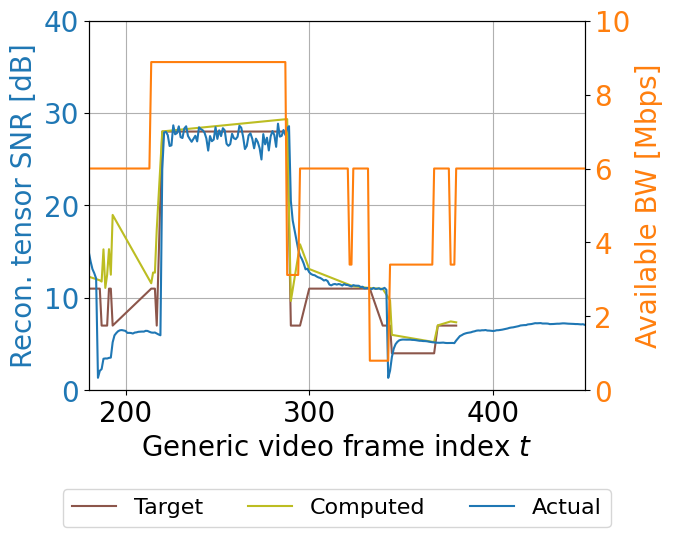

In [16]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Recon. tensor SNR [dB]', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["target_snr"],color="tab:brown",label="Target")
ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["est_snr"],color="tab:olive",label="Computed")
ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["reconstruct_snr"],color="tab:blue",label="Actual")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["reconstruct_snr"],color="tab:blue",label="Static")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
ax1.set_xlim([180, 450])
ax1.set_ylim([0,40])
ax2.set_ylim([0,10])
ax1.grid()
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_snr.pdf", bbox_inches='tight')